# Package Setup

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import time

!git clone https://github.com/garrettj403/SciencePlots.git
!pip install git+https://github.com/garrettj403/SciencePlots
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

Cloning into 'SciencePlots'...
remote: Enumerating objects: 1270, done.
remote: Counting objects: 100% (402/402), done.
remote: Compressing objects: 100% (178/178), done.
remote: Total 1270 (delta 241), reused 353 (delta 212), pack-reused 868
Receiving objects: 100% (1270/1270), 84.40 MiB | 38.53 MiB/s, done.
Resolving deltas: 100% (704/704), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/garrettj403/SciencePlots to /tmp/pip-req-build-5gm1j4hf
  Running command git clone --filter=blob:none --quiet https://github.com/garrettj403/SciencePlots /tmp/pip-req-build-5gm1j4hf
  Resolved https://github.com/garrettj403/SciencePlots to commit 390cfa26c89004420ce0f5da4f3f14d0ef4c3ea3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for SciencePlots: filename=SciencePlot

# Quad Function

In [21]:
# Info
quad?

In [3]:
# Defining functions

def f(x):
    return np.exp(-x**2) * np.sin(x)**2

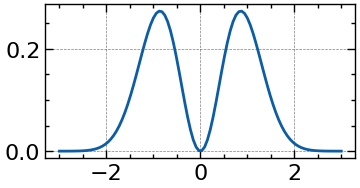

In [6]:
# Plotting

# Domain
x = np.linspace(-3, 3, 100)
y = f(x)

plt.figure(figsize=(4,2))
plt.plot(x,y)
plt.savefig('Example1.png', dpi=200)
plt.show()

Quad Function

In [8]:
# Finds the integral of f from -2 to 2
# Element 1 in array = result. 
# Element 2 in array = error estimate

result = quad(f, -2, 2)
result

(0.5548809679928509, 6.454188583322057e-13)

In [9]:
# Functions can take in arguments as well

def f(x, a, b):
    return np.exp(-a*x**2) * np.sin(b*x)**2
    
result = quad(f, -np.inf, np.inf, args=(2,3))
result

(0.619695537451406, 3.5151775346145116e-09)

Adjusting calculation speed:

Faster = not as accurate

In [14]:
# Slower:

t1 = time.perf_counter()

# Take 10000 integrals
[quad(f, -np.inf, np.inf, args=(2,3)) for i in range(10000)]
t2 = time.perf_counter()
print(t2-t1)

9.888165570999945


In [15]:
# Faster:

t1 = time.perf_counter()

# Take 10000 integrals
[quad(f, -np.inf, np.inf, args=(2,3), epsabs=1e-4) for i in range(10000)]
t2 = time.perf_counter()
print(t2-t1)

6.365837873000032


# Caveats

Sparse Functions

In [16]:
def f(x):
    return np.exp(-(x-700)**2) + np.exp(-(x+700)**2)

x = np.linspace(-750, 750, 10000)
y = f(x)

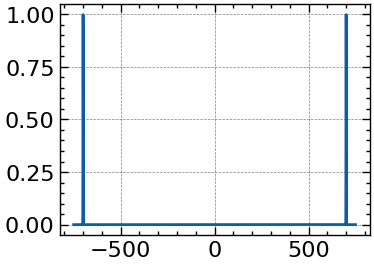

In [18]:
plt.figure(figsize=(4,3))
plt.plot(x,y)
# Two very high peaks very far apart
plt.show()

In [19]:
# This will fail to find the integral because quad separates the domain into different regions
# This works for functions that have values that are constant throughout the integration, but not for sparse functions
quad(f, -np.inf, np.inf)

(0.0, 0.0)

In [22]:
# To solve this, tell quad where the integral is non-zero

quad(f, -800, 800, points=[-700,700])

(3.544907701811011, 1.9972729262444992e-10)

In [23]:
2*np.sqrt(np.pi)

3.5449077018110318